In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime
import json
import tweepy

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Entrando com sua credencia do twitter
consumer_key = "colque sua credencial aqui"

In [4]:
consumer_secret = "colque sua credencial aqui"

In [5]:
access_token = "colque sua credencial aqui"

In [6]:
access_token_secret = "colque sua credencial aqui"

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)

In [8]:
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# Utilizando um arquivo para fazer as crendenciais
keys_file = open('nome_do_arquivo.fonte_do_arquivo')
lines = keys_file.readlines()
API_key = lines[0].rstrip()
API_secre_key = lines[1].rstrip()
Access_token = lines[2].rstrip()
Access_token_secret = lines[3].rstrip()

In [9]:
#Construir a API
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=5, retry_delay=10)

### Coleta de dadoa (busca por palavra chave)

In [10]:
# Definir listas de armazenamento
tweets = []
info = []

In [12]:
#Definir que palavras (keyward) que deseja pesquisar no Twitter

keyword = ("Economia OR Política ")

### Busca por palavra chave e recuperar os tweets em inglês

In [13]:
for tweet in tweepy.Cursor(api.search,
                          q=keyword, tweet_mode='extended',
                          rpp=200,
                          result_type='mixed', lang='pt',
                          include_entitles=True).items(200):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
    
    newtweet = aux.replace("\n"," ")
    
    tweets.append(newtweet)
    info.append(tweet)
    file = open("palavras_formula1.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()

In [14]:
# Para verficar a quantidade de tweets coletado use a função "len()"
print("Total de tweets coletados %s." %(len(info)))

Total de tweets coletados 200.


### Criar um dataframe

In [17]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

tweets_df['len'] = np.array([len(tweet) for tweet in tweets])
tweets_df['ID'] = np.array([tweet.id for tweet in info])
tweets_df['USER'] = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Data'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes'] = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets'] = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo'] = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates'] = np.array([tweet.coordinates for tweet in info])
tweets_df['Place'] = np.array([tweet.place for tweet in info])

tweets_df.to_csv("noticias.csv")

In [18]:
tweets_df.head(10)

,Tweets,len,ID,USER,userName,User Location,Language,Data,Source,Likes,Retweets,Geo,Coordinates,Place
0,"""Vou fechar a economia até surgir a vacina. Qu...",280,1301491682073104385,ArthurWeint,Arthur Weintraub,None,None,2020-09-03 12:06:12,Twitter for Android,19448,5411,None,None,None
1,"AMEI, AMEI, AMEII!!!! Obrigada aos goianos res...",268,1301253377670762497,DamaresAlves,Damares Alves,None,None,2020-09-02 20:19:16,Twitter for Android,20178,3646,None,None,Place(_api=<tweepy.api.API object at 0x0000027...
2,O maior castigo para aqueles que não se intere...,140,1301472044706562049,andretrig,André Trigueiro,None,None,2020-09-03 10:48:10,Twitter for iPhone,5504,712,None,None,None
3,Assembleia aprova projeto que proíbe distribui...,154,1301613627431104517,CidadeFortal,FORTALEZA - CE,None,None,2020-09-03 20:10:46,Twitter Web App,0,0,None,None,None
4,"“Gripezinha, resfriadinho, fantasia, salvar ec...",120,1301613617016602624,JOSECLOVESSILV1,JOSE CLOVES SILVA SOUSA,None,None,2020-09-03 20:10:43,Twitter for Android,0,110,None,None,None
5,31 mil reais POR DIA. Eis o gasto de ⁦@jairbol...,183,1301613613715726338,AntnioM85638126,Antônio Marcos dos Santos,None,None,2020-09-03 20:10:42,Twitter for Android,0,60,None,None,None
6,A campanha midiática internacional contra Bols...,254,1301613611899670535,rubensfbritof,Rubens Brito Filho 🇧🇷⚽️,None,None,2020-09-03 20:10:42,Twitter for Android,0,633,None,None,None
7,Frente da reforma administrativa elogia texto;...,97,1301613611744481300,izebaraujo,Izeneide Barros,None,None,2020-09-03 20:10:42,Twitter Web App,0,2,None,None,None
8,maravilhas como esta não se inventam. a lei q...,261,1301613611140485120,SergioMBAvelar,Sérgio Avelar,None,None,2020-09-03 20:10:42,Twitter for Android,0,36,None,None,None
9,Regras da reforma administrativa não afetam ju...,95,1301613610997878784,jspldc,jspldc🚩🚩🚩🚩❤️❤️❤️,None,None,2020-09-03 20:10:42,Twitter for Android,0,598,None,None,None


In [19]:
tweets_df['Tweets'][5]

'31 mil reais POR DIA. Eis o gasto de \u2066@jairbolsonaro\u2069 com o cartão corporativo, cujos demonstrativos são - por obra e graça do miliciano - mantidos em sigilo.  https://t.co/XFPBbV2Wyt'

### Identificar Top Tweets coletados

In [20]:
#Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) # Função max do numpy identifica o valor máximo
likes = tweets_df[tweets_df.Likes == likes_max].index[0] # pega o primeiro tweet com valor máximo
print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente @jairbolsonaro.🇧🇷  #governobolsonaro https://t.co/qupRRh4Wze
Número de curtidas: 20178


In [21]:
print(np.sum(tweets_df['Likes'] == likes_max)) # Quantos tweets possuem o mesmo valor máximo

1


In [22]:
retweet_max = np.max(tweets_df['Retweets'])# Retorna o valor máximo

retweet = tweets_df[tweets_df.Retweets == retweet_max].index[0]# pega o primeiro retweet com o valor máximo

print("O valor com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O valor com mais retweet é: 
lindo o lobo guara da nota de 200 com cara de quem não se alimenta há dias pois  teve seu habitat natural destruído pela política ambiental de Ricardo Salles achei verossímil achei plausível
Número de retweets: 22058


### Identificar a fonte(origem) do tweet

In [23]:
sources = [] # Lista para armazenar as fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) # inclui no vetor source apenas se a fonte encontrada ainda

percent = np.zeros(len(sources)) # Retorna um novo vetor, com o número de elementos do vetor sou

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

### Gráfico que exibe o número de tweets por fonte

In [24]:
sourceDF = pd.DataFrame({'source':percent,}, index=sources)
sourceDF

,source
Twitter for Android,116.0
Twitter for iPhone,24.0
Twitter Web App,54.0
Twitter for iPad,1.0
Bahia.ba,1.0
TweetDeck,2.0
insta: tevinobuzao,1.0
WordPress.com,1.0


In [25]:
# Excluir quando o número de tweets da fonte for < 10
sourceDF = sourceDF.drop(sourceDF[sourceDF.source < 10].index)

In [27]:
# Pacote para visualização
import matplotlib.pyplot as plt

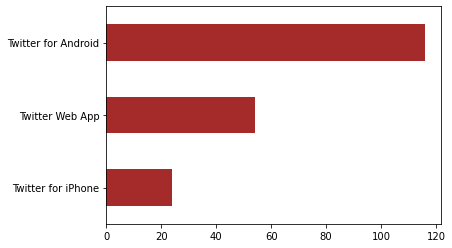

In [29]:
# Gráfico para comparar a quantidade de twitters por fonte
sources_sorted = sourceDF.sort_values('source', ascending=True)
ax = sources_sorted.source.plot(kind='barh', color="#A52A2A")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

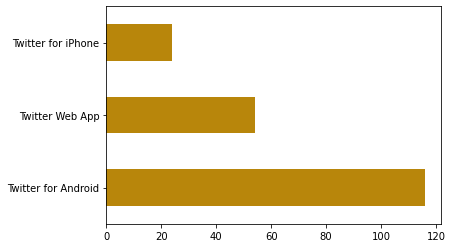

In [30]:
sources_sorted = sourceDF.sort_values('source', ascending=False)
ax = sources_sorted.source.plot(kind='barh', color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#### Análise de polaridade

In [32]:
# Instalando a biblioteca
!pip install -U textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [33]:
# Importando a biblioteca de polaridade
from textblob import TextBlob as tb

In [34]:
#Variável que irá armazenar as polaridades
analysis = None
#Lista vazia para armazenar as polaridades
polarities = []

### Calcula polaridade (sentiment.polarity)

In [35]:
for tweet in tweets_df['Tweets']: #para cada tweet
    analysis = tb(tweet)
    polarity = analysis.sentiment.polarity #analisa a polaridade
    polarities.append(polarity)

In [36]:
for tweet in tweets_df['Tweets']: #para cada tweet
    
    polarity = tb(tweet).sentiment.polarity #analisa a polaridade
    
    polarities.append(polarity)

In [37]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0, -0.1, 0.1, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.025, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, -0.8, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.05, 0.03333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.75, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.17045454545454544, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.4166666666666667, 0.

Para Tweets em Português:

In [39]:
!pip install unidecode

  Using cached Unidecode-1.1.1-py2.py3-none-any.whl (238 kB)


In [40]:
from unidecode import unidecode

In [41]:
# Importar biblioteca para traduzir os tweets
!pip install googletrans

Processing c:\users\ferna\appdata\local\pip\cache\wheels\20\da\eb\a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d\googletrans-3.0.0-py3-none-any.whl
  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached rfc3986-1.4.0-py2.py3-none-any.whl (31 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
  Using cached sniffio-1.1.0-py3-none-any.whl (4.5 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl (53 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl (38 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl (12 kB)


In [44]:
# Importar a biblioteca para a tradução de tweets
from googletrans import Translator

In [45]:
# Vendo o primeiro tweet encontrado
tweets_df['Tweets'][1]

'AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente @jairbolsonaro.🇧🇷  #governobolsonaro https://t.co/qupRRh4Wze'

In [47]:
# Passando os tweets em português para o inglês
textPT = unidecode(tweets_df['Tweets'][1])
textEN = Translator().translate(textPT)

In [48]:
textEN.text

'LOVED, LOVED, LOVED !!!! Thanks to the people from Goiás responsible for the beautiful billboard. Before we saw thousands of Brazilians ashamed of the political class, today I see millions happy with this super team of President @jairbolsonaro. #governobolsonaro https://t.co/qupRRh4Wze'

In [49]:
analysis = tb(textEN.text)
# Calculando a polaridade do texto traduzido
polarity = analysis.sentiment.polarity # analisa a polaridade

In [50]:
polarity

0.5314814814814814

In [51]:
polaridades = []

In [53]:
for tweet in tweets_df['Tweets']: #para cada tweet
    #texto do tweet
    textPT = unidecode(tweet)
    
    #Traduzindo para o inglês
    textEN = Translator().translate(textPT)
    
    analysis = tb(textEN.text)
    #Calculando a polaridade do texto traduzido
    polaridade = analysis.sentiment.polarity # analisa a polaridade
    polaridades.append(polaridade)

In [54]:
print('Vetor de polaridade:',polaridades)

Vetor de polaridade: [0.0, 0.5314814814814814, 0.375, 0.0, -0.6125, -0.0625, -0.025, 0.0, -0.04999999999999999, -0.1, 0.375, 0.1, 0.3204545454545455, 0.0, 0.09523809523809523, -0.1, 0.2, 0.25, -0.05, 0.525, 0.0, 0.052000000000000005, 0.16428571428571428, 0.20000000000000004, 0.0, 0.0, -0.10000000000000003, 0.30333333333333334, 0.2, 0.0, -0.125, 0.2857142857142857, 0.0, 0.016666666666666666, 0.12222222222222223, 0.13636363636363635, -0.05, 0.025, 0.1766666666666667, -0.35, 0.11851851851851854, -0.26166666666666666, -0.43333333333333335, 0.4625, 0.2, 0.171875, 0.06500000000000002, -0.025, -0.18750000000000003, 0.0, 0.19375, 0.04545454545454545, 0.25, 0.22545454545454544, 0.29000000000000004, 0.4625, -0.05, 0.0, 0.0, 0.27142857142857146, 0.0, -0.15, 0.4625, 0.0, 0.5, 0.0, 0.22545454545454544, 0.16428571428571428, 0.4625, -0.125, -0.12121212121212122, 0.4625, 0.4681818181818182, 0.0, -0.6999999999999998, 0.2555555555555556, -0.6, 0.4625, 0.15, 0.15416666666666667, 0.4625, 0.4625, 0.6, -0.1

### Análise de sentimentos

In [55]:
print('Para a(s) palavras(s):"%s" % keyword')
print('A média de sentimento é: ' + str(np.mean(polaridades)))

Para a(s) palavras(s):"%s" % keyword
A média de sentimento é: 0.09129432905738052


In [56]:
positive = 0
negative = 0
neutral = 0
for polaridade in polaridades:
    if polaridade > 0:
        positive = positive+1
    elif polaridade < 0:
        negative = negative+1
    else:
        neutral = neutral+1

# Calcular percentual
pos_pct=positive*100/len(polaridades)
neg_pct=negative*100/len(polaridades)
neu_pct=neutral*100/len(polaridades)

In [57]:
#Define variáveis
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

In [58]:
percents

[53.8235294117647, 23.823529411764707, 22.352941176470587]

In [59]:
# Criar uma array (series) denominada pie_chart com os valores da variável percents
# Onde o índice da array equivale aos valores da variável sentiments.

pie_chart = pd.Series(percents, index=sentiments,name='')

In [60]:
pie_chart

Positivos    53.823529
Negativos    23.823529
Neutros      22.352941
Name: , dtype: float64

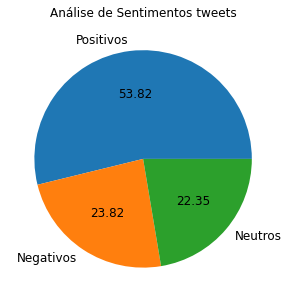

In [61]:
# Gerar o gráfico de pizza

pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5,5), labels=pie_chart.index,
                  title="Análise de Sentimentos tweets")

### Modelo alternativo de gráfico:

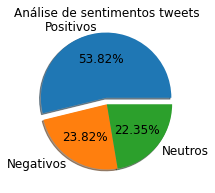

In [62]:
explode = (0.1,0,0) # Separar o primeiro
pie_chart.plot.pie(fontsize=12, explode=explode,
                  autopct='%.2f%%', shadow=True, figsize=(3,3),
                  title="Análise de sentimentos tweets")

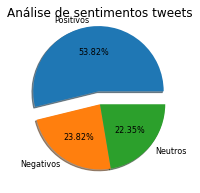

In [63]:
explode = (0.2,0,0) # Separa o primeiro
pie_chart.plot.pie(fontsize=8, explode=explode,
                  autopct='%.2f%%', shadow=True, figsize=(3,3),
                  title="Análise de sentimentos tweets")

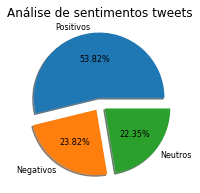

In [64]:
explode = (0.1,0.1,0.1)# Sepra os três
pie_chart.plot.pie(fontsize=8, explode=explode,
                  autopct='%.2f%%', shadow=True, figsize=(3,3),
                  title="Análise de sentimentos tweets")

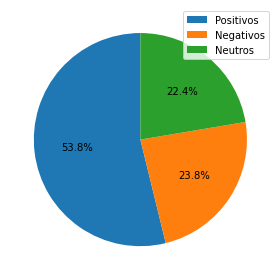

In [65]:
# usando pacote Matplotlib
plt.pie(percents, autopct='%1.1f%%', startangle=90)
plt.legend(sentiments, loc="best")
plt.tight_layout()
plt.show()

### Mapa de calor dos tweets

In [67]:
!pip install geopy

In [69]:
!pip install folium

In [70]:
# Trabalhando com mapas
from geopy.geocoders import Nominatim
import folium
from folium import plugins

### Funcionamento

In [71]:
# Como saber a latitude de determinada região usando o nome do estado
locator = Nominatim(user_agent="student")
exemplo = locator.geocode("Fernando de noronha")

In [72]:
exemplo

Location(Parque Nacional Marinho de Fernando de Noronha, Pernambuco, Região Nordeste, Brasil, (-3.8545643, -32.37861623300567, 0.0))

In [73]:
print('A latitude de Fernando de Noronha é %s .' % exemplo.latitude)
print('A longitude de Fernando é %s' % exemplo.longitude)

A latitude de Fernando de Noronha é -3.8545643 .
A longitude de Fernando é -32.37861623300567


In [74]:
geolocator = Nominatim(user_agent="TwitterSentimentAnalysis")

#Lista para armazenar a latitude e a longitude
latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue
    

In [75]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('Mapa_Calor_covid_en_Turm3.html')
mapa

### Nuvem de palavras

In [78]:
!pip install wordcloud

In [79]:
from wordcloud import WordCloud, STOPWORDS

In [82]:
# Usando frase encontrada do twitter para forma uma nuvem de palavras
sentenca = "'AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente @jairbolsonaro.🇧🇷  #governobolsonaro https://t.co/qupRRh4Wze'"
sentenca

"'AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente @jairbolsonaro.🇧🇷  #governobolsonaro https://t.co/qupRRh4Wze'"

In [83]:
# Separando cada palavra
palavras = sentenca.split()
palavras

["'AMEI,",
 'AMEI,',
 'AMEII!!!!',
 'Obrigada',
 'aos',
 'goianos',
 'responsáveis',
 'pelo',
 'lindo',
 'outdoor.',
 'Antes',
 'víamos',
 'milhares',
 'de',
 'brasileiros',
 'com',
 'vergonha',
 'da',
 'classe',
 'política,',
 'hoje',
 'vejo',
 'milhões',
 'contentes',
 'com',
 'esse',
 'super',
 'time',
 'do',
 'Presidente',
 '@jairbolsonaro.🇧🇷',
 '#governobolsonaro',
 "https://t.co/qupRRh4Wze'"]

In [84]:
# Fazer limpeza do texto tirando caracteres especiais para análise
palavras = []
for palavra in sentenca.split():
    if 'https' not in palavra and not palavra.startswith('@') and not palavra.startswith('#'):
        palavras.append(palavra)

In [86]:
# Veja que foi removido o sinal de arroba, o sinal de hashtag e o https do site.
palavras

["'AMEI,",
 'AMEI,',
 'AMEII!!!!',
 'Obrigada',
 'aos',
 'goianos',
 'responsáveis',
 'pelo',
 'lindo',
 'outdoor.',
 'Antes',
 'víamos',
 'milhares',
 'de',
 'brasileiros',
 'com',
 'vergonha',
 'da',
 'classe',
 'política,',
 'hoje',
 'vejo',
 'milhões',
 'contentes',
 'com',
 'esse',
 'super',
 'time',
 'do',
 'Presidente']

## Usando as informações do tweeter

In [87]:
words = ' '.join(tweets_df['Tweets'])

### Limpeza de dados

In [88]:
import re

In [89]:
words

'"Vou fechar a economia até surgir a vacina. Quando surgir vou obrigar todos a tomar. Sobre a cloroquina, só meus médicos podem usar (e talvez euzinho). Enquanto isso, ponha sua máscara, fique em casa e cale a boca. Tudo culpa do presidente".  Esse é o democrata exemplar da mídia. AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente @jairbolsonaro.🇧🇷  #governobolsonaro https://t.co/qupRRh4Wze O maior castigo para aqueles que não se interessam por política, é que serão governados pelos que se interessam.   (Arnold Toynbee)  #bomdia Assembleia aprova projeto que proíbe distribuição de sacolas plásticas não biodegradáveis no Ceará - Política - Diário do Nordeste https://t.co/1SHuwR67Uz “Gripezinha, resfriadinho, fantasia, salvar economia, não sou coveiro...”   Bolsonaro é culpado! https://t.co/IkG3hx8mCt 31 mil reais POR DIA. Eis o gast

In [90]:
# Removendo characteres
words = re.sub(r'"', '"', words)
words = re.sub(r'"', '"', words)

# remove $
words = re.sub(r'\$\w', '',words)
# remove mentions ou menções
words = re.sub(r'@\S+', '', words)
# remove hashtags
words = re.sub(r'#\S+', '', words)
#remove hyperlinks
words = re.sub(r'https?:\/\/.*[\r\n]*', '', words)
# remove números
words = re.sub('[0-9]+', '', words)

In [91]:
words

'"Vou fechar a economia até surgir a vacina. Quando surgir vou obrigar todos a tomar. Sobre a cloroquina, só meus médicos podem usar (e talvez euzinho). Enquanto isso, ponha sua máscara, fique em casa e cale a boca. Tudo culpa do presidente".  Esse é o democrata exemplar da mídia. AMEI, AMEI, AMEII!!!! Obrigada aos goianos responsáveis pelo lindo outdoor. Antes víamos milhares de brasileiros com vergonha da classe política, hoje vejo milhões contentes com esse super time do Presidente    '

In [ ]:
# outra forma de limpeza
words_clean = " ".join([word for word in words.split()
                        if 'https' not in word
                        and not word.startswith('@')
                        and not palavra.startswith('#')
                        and word != 'RT'
                       ])

In [92]:
words_clean = " ".join([word for word in words.split()
                       if word != 'RT'])

In [93]:
!pip install warn

  Using cached warn-0.1.0-py2.py3-none-any.whl (23 kB)


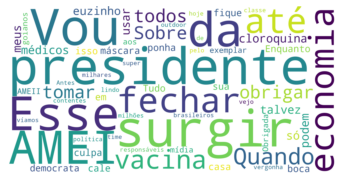

In [94]:
# Criando a nuvem de palavras
import warnings # Importando a biblioteca

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, max_font_size=300,
              background_color='white',
              mode="RGB", width=2000, height=1000,
              normalize_plurals=True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('texto_cloud.png', dpi=300)
plt.show()

### Análise temporal dos tweets

In [108]:
from datetime import datetime

In [110]:
# Tweets postados por dia
data = tweets_df
print(data['Data'][0])

2020-08-08 22:55:17


In [111]:
# Converter a data para apenas dia/mês e ano, sem a hora
data['Data'] = pd.to_datetime(data['Data']).apply(lambda x: x.date())
print(data['Data'][0])

2020-08-08


In [112]:
# Quantidade de Tweets postados por dia
QtdeDiaria = data['Data'].value_counts() #conta a quantidade de tweets por dia
QtdeDiaria

2020-08-08    374
2020-08-09     26
Name: Data, dtype: int64

<AxesSubplot:xlabel='Data'>

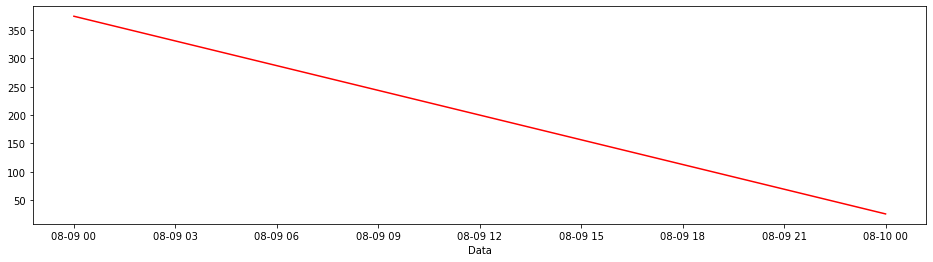

In [114]:
#Gera gráfico de linha
tlen = pd.Series(data['Data'].value_counts(), index=data['Data'])
tlen.plot(figsize=(16,4), color='r')